## Random Forest

In [697]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score

# RF
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
plt.style.use('default')


In [698]:
personas = pd.read_csv('test/data-per-person2.csv')

In [699]:
RANDOM_SEED = 12
TEST_SIZE_PERCENT = 0.1

In [700]:
personas.shape

(38829, 30)

In [701]:
# Labels para cada set
training = pd.read_csv('../data/labels_training_set.csv')
test = pd.read_csv('../data/trocafone_kaggle_test.csv')

In [702]:
# Taining set
set_training = personas.merge(training, on='person', how='inner').drop('person', axis=1).fillna(0)

# Test set kaggle
set_test = personas.merge(test, on='person', how='inner').drop('person', axis=1).fillna(0)

feature_list = list(set_test.columns)

In [703]:
y = training['label']
X = set_training.drop(axis=1, labels=['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_PERCENT, random_state=RANDOM_SEED)

In [704]:
rdf = RandomForestClassifier(
    min_samples_split=4,
    criterion = 'entropy',
    random_state=RANDOM_SEED,
    n_estimators=1000
)

In [705]:
# Training
rdf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [706]:
# Predict value
ret = rdf.predict_proba(X_test)

In [707]:
y_test_predictd = rdf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_test_predictd)

0.48214088405822386

In [708]:
rdf.score(X_test, y_test)

0.9521112255406797

In [709]:
# Predict value kaggle set
# Training
#rdf.fit(X, y)
ret = rdf.predict_proba(set_test)

In [710]:
# Get proba
test['label'] = pd.DataFrame(ret)[1]

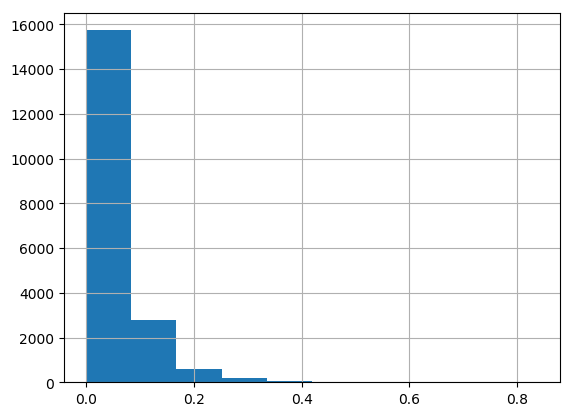

In [711]:
g = (test['label']).hist()

In [712]:
# Get numerical feature importances
importances = list(rdf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 7)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: events_mean          Importance: 0.2155141
Variable: count_top_event      Importance: 0.1860357
Variable: last_event           Importance: 0.1515738
Variable: events_cout_last_week Importance: 0.1355953
Variable: events_mean_frec_last_week Importance: 0.1212976
Variable: conv/checkout        Importance: 0.0383247
Variable: conversion_month_mean Importance: 0.0251407
Variable: new_vs_returning     Importance: 0.0192326
Variable: searched_model_Apple Importance: 0.016752
Variable: searched_model_Samsung Importance: 0.0147336
Variable: top_viewed product   Importance: 0.0122692
Variable: searched_model_Motorola Importance: 0.0100819
Variable: top_ad campaign hit  Importance: 0.0093901
Variable: top_brand listing    Importance: 0.0074389
Variable: top_searched products Importance: 0.0066757
Variable: searched_model_LG    Importance: 0.0055551
Variable: top_generic listing  Importance: 0.0050326
Variable: top_checkout         Importance: 0.0042706
Variable: searched_model_Asus  Im

In [713]:
test.to_csv('test/sumbit-2.csv', index=False)